In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

import json

from MediaContributions import MediaContributionCalculator

# Подбор diminishing return

In [12]:
def ExploreDiminishingReturn(
    data, 
    target,
    explored_regressor, 
    other_regressors,
): 
    
    alpha_range = [0.1, 0.2, 0.5, 1, 2, 4, 8, 16]
    gamma_range = [1, 2, 4, 6, 8, 10, 12, 14]

    fit_results = pd.DataFrame(index=alpha_range, columns=gamma_range, dtype='float')
    
    y = data[target]
    X_other = np.column_stack(
        [data[var] for var in other_regressors]
    )
    
    for alpha in alpha_range:
        for gamma in gamma_range: 
            X = np.column_stack([HillsTransformation(data[explored_regressor], alpha, gamma), X_other])
            fit_results.loc[alpha, gamma] = LR().fit(X, y).score(X, y)
            
    fit_results.index.set_names('Alpha', inplace=True)
    fit_results.columns.set_names('Gamma', inplace=True)
    
    position_of_max = np.unravel_index(np.argmax(fit_results), fit_results.shape) 
    alpha_best = fit_results.index[position_of_max[0]]
    gamma_best = fit_results.columns[position_of_max[1]]
    print('Best alpha: ', alpha_best, 'Best gamma: ', gamma_best)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    sns.heatmap(fit_results, annot=True, ax=ax1)
    
    x_line = np.arange(0, 30, dtype='double')
    ax2.plot(x_line, HillsTransformation(x_line, alpha_best, gamma_best), 
             label='alpha:' + str(alpha_best) + ' gamma:' + str(gamma_best))
    ax2.legend()
    
    plt.show()
    
    return fit_results

Best alpha:  2.0 Best gamma:  14


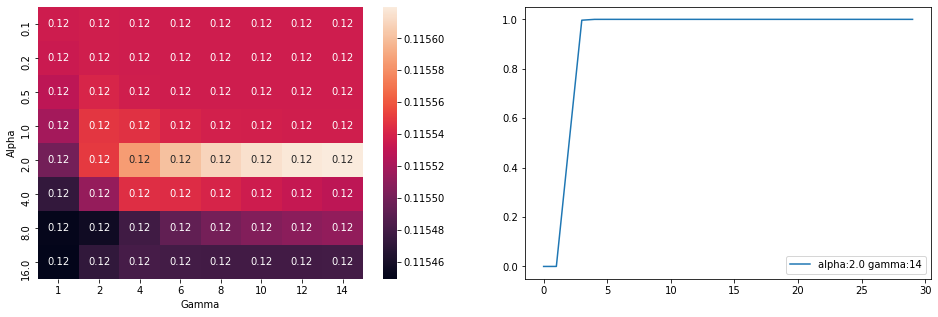

Gamma,1,2,4,6,8,10,12,14
Alpha,,,,,,,,
0.1,0.115535,0.115536,0.115536,0.115536,0.115536,0.115536,0.115536,0.115536
0.2,0.115534,0.115537,0.115536,0.115536,0.115536,0.115536,0.115536,0.115536
0.5,0.115529,0.115541,0.115537,0.115536,0.115536,0.115536,0.115536,0.115536
1.0,0.115519,0.115548,0.115546,0.115541,0.115538,0.115537,0.115537,0.115536
2.0,0.115499,0.115550,0.115585,0.115601,0.115609,0.115615,0.115618,0.115620
4.0,0.115472,0.115513,0.115545,0.115544,0.115540,0.115535,0.115532,0.115529
8.0,0.115451,0.115456,0.115478,0.115492,0.115500,0.115505,0.115509,0.115511
16.0,0.115449,0.115471,0.115481,0.115480,0.115479,0.115479,0.115479,0.115479


In [13]:
ExploreDiminishingReturn(model_data, 'TBCA Oxota', 'OOH freq', 
                        ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve'])

Best alpha:  2.0 Best gamma:  4


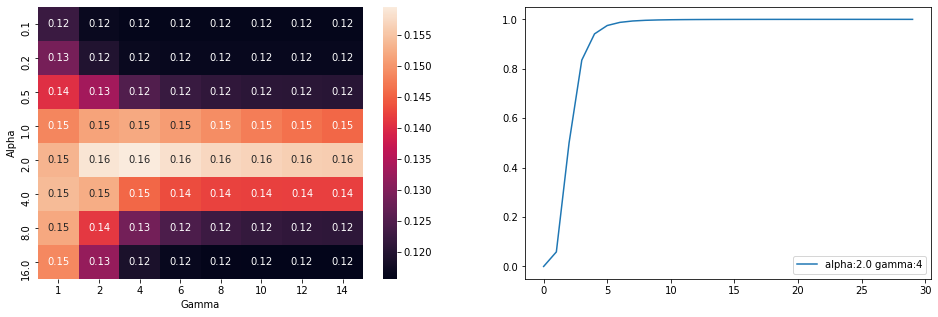

Gamma,1,2,4,6,8,10,12,14
Alpha,,,,,,,,
0.1,0.122368,0.116811,0.116080,0.116062,0.116072,0.116085,0.116095,0.116101
0.2,0.128871,0.119572,0.116698,0.116555,0.116571,0.116578,0.116574,0.116566
0.5,0.140431,0.133458,0.124916,0.122269,0.121253,0.120764,0.120501,0.120357
1.0,0.148531,0.151465,0.152061,0.150792,0.149153,0.147682,0.146485,0.145542
2.0,0.153257,0.158695,0.159535,0.158229,0.157231,0.156623,0.156261,0.156036
4.0,0.153953,0.152370,0.145566,0.143141,0.142367,0.142089,0.141985,0.141960
8.0,0.151848,0.141318,0.128629,0.124450,0.122676,0.121794,0.121314,0.121039
16.0,0.148733,0.132109,0.118899,0.116531,0.115960,0.115774,0.115698,0.115661


In [14]:
ExploreDiminishingReturn(model_data, 'TBCA Oxota', 'Instore freq', 
                        ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve'])

Best alpha:  8.0 Best gamma:  4


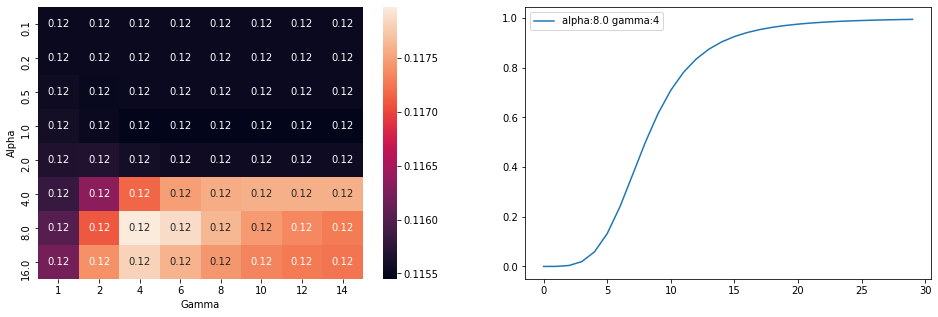

Gamma,1,2,4,6,8,10,12,14
Alpha,,,,,,,,
0.1,0.115523,0.115520,0.115520,0.115520,0.115520,0.115520,0.115520,0.115520
0.2,0.115526,0.115517,0.115520,0.115520,0.115520,0.115520,0.115520,0.115520
0.5,0.115543,0.115507,0.115510,0.115517,0.115520,0.115520,0.115520,0.115520
1.0,0.115579,0.115509,0.115457,0.115450,0.115449,0.115449,0.115449,0.115449
2.0,0.115664,0.115667,0.115582,0.115552,0.115545,0.115544,0.115544,0.115544
4.0,0.115817,0.116331,0.117165,0.117480,0.117569,0.117587,0.117586,0.117582
8.0,0.116016,0.117094,0.117976,0.117869,0.117638,0.117461,0.117348,0.117281
16.0,0.116204,0.117394,0.117810,0.117608,0.117439,0.117333,0.117272,0.117237


In [15]:
ExploreDiminishingReturn(model_data, 'TBCA Oxota', 'Bar freq', 
                        ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve'])

# Tests

In [3]:
model_data = pd.read_csv('model_data.csv')

In [59]:
# Test  CheckFixSpec
model_spec = {
    'Target variables': [
        'TBCA Oxota', 'OOH Oxota', 'Buy m.o. Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Bar freq',     'Alpha': 2, 'Gamma': 12},
    ], 
    'Other variables': ['Volume', 'Media coverage'], 
    'Relevance groups variable': None,
    'Subsample variables': None 
}


xmc = MediaContributionCalculator(p_value=0.1)
print("version control: ", xmc.version)
xmc.CheckFixSpec(model_data, model_spec)

version control:  1.001


{'Target variables': ['TBCA Oxota',
  'OOH Oxota',
  'Buy m.o. Oxota',
  'Trial Oxota',
  'Unaided Oxota',
  'Consider T1 Oxota'],
 'Campaign variables': [{'Name': 'OOH freq', 'Alpha': 2, 'Gamma': 12},
  {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 12},
  {'Name': 'Bar freq', 'Alpha': 2, 'Gamma': 12}],
 'Other variables': ['Volume', 'Media coverage'],
 'Relevance groups variable': None,
 'Subsample variables': []}

In [60]:
# Test ContributionsOneTarget
model_spec = {
    'Target variables': [
        'TBCA Oxota', 'OOH Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Bar freq',     'Alpha': 2, 'Gamma': 12},
    ], 
    'Other variables': ['Volume', 'Media coverage'], 
    'Relevance groups variable': 'Buy m.o. Oxota',
    'Subsample variables': ['Trial Oxota'] 
}

xmc = MediaContributionCalculator(p_value=0.05, correct_base=True)
print("version control: ", xmc.version)
model_spec = xmc.CheckFixSpec(model_data, model_spec)
result = xmc.ContributionsOneTarget(model_data, 'OOH Oxota', model_spec)

pd.DataFrame(result)

version control:  1.001


OOH Oxota
Total==all        Observed value   0.142857
                  OOH freq         0.000000
                  Instore freq     0.000000
                  Bar freq         0.000000
                  Volume           0.000000
                  Media coverage   0.012854
                  Base             0.130003
Trial Oxota==0    Observed value   0.085106
                  OOH freq         0.000000
                  Instore freq     0.000000
                  Bar freq         0.000000
                  Volume           0.000000
                  Media coverage   0.022974
                  Base             0.062133
Trial Oxota==1    Observed value   0.150134
                  OOH freq         0.000000
                  Instore freq     0.000000
                  Bar freq         0.000000
                  Volume           0.000000
                  Media coverage   0.011579
                  Base             0.138555
Buy m.o. Oxota==0 Observed value   0.116838
                  OOH freq         0.000000
                  Instore freq     0.000000
                  Bar freq         0.000000
                  Volume           0.000000
                  Media coverage   0.018553
                  Base             0.098286
Buy m.o. Oxota==1 Observed value   0.201550
                  OOH freq         0.000000
                  Instore freq     0.000000
                  Bar freq         0.000000
                  Volume           0.000000
                  Media coverage   0.000000
                  Base             0.201550

In [61]:
# Test ContributionsMultiTarget
model_data = pd.read_csv('model_data.csv')
model_spec = {
    'Target variables': [
        #'TBCA Oxota', 'OOH Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
        'TBCA Oxota', 'OOH Oxota',
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': ['Volume', 'Media coverage'], 
    'Relevance groups variable': 'Buy m.o. Oxota',
    'Subsample variables': ['Trial Oxota'] 
}

xmc = MediaContributionCalculator(p_value=0.05, correct_base=True)
print("version control: ", xmc.version)
model_spec = xmc.CheckFixSpec(model_data, model_spec)

result = xmc.ContributionsMultiTarget(model_data, model_spec)
result

version control:  1.001


TBCA Oxota  OOH Oxota
Total==all        Observed value    0.616667   0.142857
                  OOH freq          0.000000   0.000000
                  Instore freq      0.176534   0.000000
                  Bar freq          0.000000   0.002725
                  Volume            0.000000   0.000000
                  Media coverage    0.024623   0.013108
                  Base              0.415510   0.127025
Trial Oxota==0    Observed value    0.468085   0.085106
                  OOH freq          0.000000   0.000000
                  Instore freq      0.135646   0.000000
                  Bar freq          0.000000   0.000659
                  Volume            0.000000   0.000000
                  Media coverage    0.023511   0.023426
                  Base              0.308928   0.061021
Trial Oxota==1    Observed value    0.635389   0.150134
                  OOH freq          0.000000   0.000000
                  Instore freq      0.181686   0.000000
                  Bar freq          0.000000   0.002985
                  Volume            0.000000   0.000000
                  Media coverage    0.024763   0.011807
                  Base              0.428940   0.135342
Buy m.o. Oxota==0 Observed value    0.556701   0.116838
                  OOH freq          0.000000   0.000000
                  Instore freq      0.169134   0.000000
                  Bar freq          0.000000   0.003932
                  Volume            0.000000   0.000000
                  Media coverage    0.018986   0.018918
                  Base              0.368581   0.093988
Buy m.o. Oxota==1 Observed value    0.751938   0.201550
                  OOH freq          0.000000   0.000000
                  Instore freq      0.193227   0.000000
                  Bar freq          0.000000   0.000000
                  Volume            0.000000   0.000000
                  Media coverage    0.037339   0.000000
                  Base              0.521372   0.201550

In [409]:
# Test RunFromFilesSpec

#xmc = MediaContributionCalculator(p_value=0.1)
#xmc.RunModelFromFilesSpec('model_data.csv', 'model_spec.json', 'outfile')

# Other variables 

WOM +ve is taken with R2:  0.0697763529246006
Media coverage is taken with R2:  0.10234471956179414
Experience +ve is taken with R2:  0.11526659159326125
Volume is taken with R2:  0.11544698280439947


,Model,R2,Beta Base,Beta Volume,Beta Media coverage,Beta WOM +ve,Beta Experience +ve,P-value Base,P-value Volume,P-value Media coverage,P-value WOM +ve,P-value Experience +ve
0,"['Base', 'Volume']",0.000243,0.605804,0.002775,NaN,NaN,NaN,0.0,0.749987,NaN,NaN,NaN
1,"['Base', 'Media coverage']",0.041551,0.588689,NaN,0.379053,NaN,NaN,0.0,NaN,0.000026,NaN,NaN
2,"['Base', 'WOM +ve']",0.069776,0.558739,NaN,NaN,0.342669,NaN,0.0,NaN,NaN,3.900884e-08,NaN
3,"['Base', 'Experience +ve']",0.043093,0.512315,NaN,NaN,NaN,0.201970,0.0,NaN,NaN,NaN,0.000018
4,"['Base', 'WOM +ve', 'Volume']",0.069785,0.556710,0.000526,NaN,0.342486,NaN,0.0,0.950166,NaN,4.257668e-08,NaN
5,"['Base', 'WOM +ve', 'Media coverage']",0.102345,0.537496,NaN,0.336996,0.321195,NaN,0.0,NaN,0.000117,1.748095e-07,NaN
6,"['Base', 'WOM +ve', 'Experience +ve']",0.083610,0.505384,NaN,NaN,0.281392,0.123317,0.0,NaN,NaN,2.186464e-05,0.012487
7,"['Base', 'WOM +ve', 'Media coverage', 'Volume']",0.102348,0.538721,-0.000319,0.337084,0.321300,NaN,0.0,0.969256,0.000119,1.842948e-07,NaN
8,"['Base', 'WOM +ve', 'Media coverage', 'Experie...",0.115267,0.486211,NaN,0.332327,0.262254,0.119213,0.0,NaN,0.000132,5.963911e-05,0.014107
9,"['Base', 'WOM +ve', 'Media coverage', 'Experie...",0.115447,0.494826,-0.002406,0.332933,0.262338,0.120654,0.0,0.771260,0.000132,6.045334e-05,0.013570


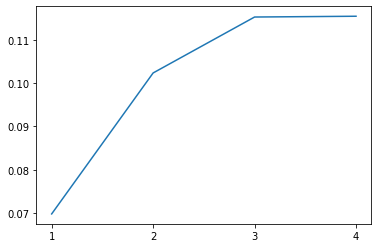

In [2]:
model_data = pd.read_csv('model_data.csv')
model_spec = {
    'Target variables': [
        #'TBCA Oxota', 'OOH Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
        'TBCA Oxota', 'OOH Oxota',
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve'], 
    'Relevance groups variable': 'Buy m.o. Oxota',
    'Subsample variables': ['Trial Oxota'] 
}


xmc = MediaContributionCalculator()


model_spec = xmc.CheckFixSpec(model_data, model_spec)
result = xmc.ValidateNonCampaignVariables(model_data, 'TBCA Oxota', model_spec)
result #.to_excel('model_build.xlsx')

In [43]:
from LinearRegression import SubSampleRegression

model_data = pd.read_csv('model_data.csv')
model_data['Base'] = 1

ssr = SubSampleRegression(1) 

X_names =  ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve', 'Base']
y_name = 'TBCA Oxota'

ssr.Fit(model_data, X_names, y_name, 'Trial Oxota')

ssr.Score(model_data, y_name)

0.12020620326966347

In [44]:
from LinearRegression import LR
from sklearn.metrics import r2_score

filt_0 = model_data['Trial Oxota'] == 0 
filt_1 = model_data['Trial Oxota'] == 1

reg_0 = LR(fit_intercept=False).fit(model_data.loc[filt_0, X_names], model_data.loc[filt_0, y_name])
reg_1 = LR(fit_intercept=False).fit(model_data.loc[filt_1, X_names], model_data.loc[filt_1, y_name])

model_data.loc[filt_0, 'Pred'] = reg_0.predict(model_data.loc[filt_0, X_names])
model_data.loc[filt_1, 'Pred'] = reg_1.predict(model_data.loc[filt_1, X_names])

print(r2_score(model_data[y_name], model_data['Pred']))
model_data['Pred_my'] = ssr.Predict(model_data)

model_data.to_csv('t2.csv')

0.12020620326966347


PermissionError: [Errno 13] Permission denied: 't2.csv'

# Test RG variable validation

In [63]:
# списки во всех секциях

model_data = pd.read_csv('model_data.csv')
model_spec = {
    'Target variables': [
        #'TBCA Oxota', 'OOH Oxota', 'Trial Oxota', 'Unaided Oxota', 'Consider T1 Oxota'
        'TBCA Oxota', 'OOH Oxota',
    ], 
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve'], 
    'Relevance groups variable': ['Buy m.o. Oxota', 'Trial Oxota', 'Unaided Oxota'], 
    'Subsample variables': None
}


xmc = MediaContributionCalculator()
model_spec = xmc.CheckFixSpec(model_data, model_spec)

xmc.ValidateRGVariables(model_data, model_spec)

OOH freq_dr Instore freq_dr  \
RG var -> target var       R2    RG values                               
Buy m.o. Oxota->TBCA Oxota 0.173 0           -0.007904        0.280408   
                                 1           -0.079882        0.206788   
Buy m.o. Oxota->OOH Oxota  0.083 0           -0.007074        0.057457   
                                 1            0.050732       -0.006139   
Trial Oxota->TBCA Oxota    0.168 0           -0.117217        0.347796   
                                 1           -0.017292        0.251262   
Trial Oxota->OOH Oxota     0.093 0             -0.0038        0.020063   
                                 1            0.016639        0.050703   
Unaided Oxota->TBCA Oxota  0.178 0            -0.01049         0.17003   
                                 1           -0.050249        0.345243   
Unaided Oxota->OOH Oxota   0.089 0            0.060889        0.018615   
                                 1           -0.026023        0.053916   

                                           Bar freq_dr    Volume  \
RG var -> target var       R2    RG values                         
Buy m.o. Oxota->TBCA Oxota 0.173 0            0.800877 -0.003302   
                                 1            0.199089 -0.026089   
Buy m.o. Oxota->OOH Oxota  0.083 0            1.381827 -0.010585   
                                 1            0.585053   0.00126   
Trial Oxota->TBCA Oxota    0.168 0           18.732942  0.006151   
                                 1            0.385215 -0.012249   
Trial Oxota->OOH Oxota     0.093 0           31.609697 -0.013992   
                                 1            0.784246 -0.007463   
Unaided Oxota->TBCA Oxota  0.178 0            0.752111 -0.009501   
                                 1           -0.437242 -0.006844   
Unaided Oxota->OOH Oxota   0.089 0            0.610463 -0.010892   
                                 1            1.580103  -0.00251   

                                           Media coverage   WOM +ve  \
RG var -> target var       R2    RG values                            
Buy m.o. Oxota->TBCA Oxota 0.173 0               0.358092  0.188887   
                                 1                0.26494  0.249957   
Buy m.o. Oxota->OOH Oxota  0.083 0               0.359021 -0.001213   
                                 1                0.02344  0.085406   
Trial Oxota->TBCA Oxota    0.168 0               0.349211 -0.296083   
                                 1               0.317764  0.223083   
Trial Oxota->OOH Oxota     0.093 0               0.636725 -1.356128   
                                 1               0.166277  0.067419   
Unaided Oxota->TBCA Oxota  0.178 0               0.360953  0.249207   
                                 1               0.306363   0.22271   
Unaided Oxota->OOH Oxota   0.089 0               0.408717  0.087348   
                                 1              -0.014814  0.074281   

                                           Experience +ve      Base  
RG var -> target var       R2    RG values                           
Buy m.o. Oxota->TBCA Oxota 0.173 0               0.091952  0.356159  
                                 1              -0.021525   0.64762  
Buy m.o. Oxota->OOH Oxota  0.083 0               0.060787  0.083903  
                                 1              -0.043825  0.168465  
Trial Oxota->TBCA Oxota    0.168 0               0.335682  0.327425  
                                 1               0.063277  0.441252  
Trial Oxota->OOH Oxota     0.093 0               0.689784   0.06709  
                                 1               0.027832  0.096629  
Unaided Oxota->TBCA Oxota  0.178 0               0.130906  0.476721  
                                 1               0.076431  0.330154  
Unaided Oxota->OOH Oxota   0.089 0               0.076252  0.072861  
                                 1               0.020422  0.094634

In [67]:
# один Target variables

model_data = pd.read_csv('model_data.csv')
model_spec = {
    #'Target variables': 'TBCA Oxota',
    'Target variables': ['TBCA Oxota'],
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve'], 
    'Relevance groups variable': ['Buy m.o. Oxota', 'Trial Oxota', 'Unaided Oxota'], 
    'Subsample variables': None
}


xmc = MediaContributionCalculator()
model_spec = xmc.CheckFixSpec(model_data, model_spec)

xmc.ValidateRGVariables(model_data, model_spec)

OOH freq_dr Instore freq_dr  \
RG var -> target var       R2    RG values                               
Buy m.o. Oxota->TBCA Oxota 0.173 0           -0.007904        0.280408   
                                 1           -0.079882        0.206788   
Trial Oxota->TBCA Oxota    0.168 0           -0.117217        0.347796   
                                 1           -0.017292        0.251262   
Unaided Oxota->TBCA Oxota  0.178 0            -0.01049         0.17003   
                                 1           -0.050249        0.345243   

                                           Bar freq_dr    Volume  \
RG var -> target var       R2    RG values                         
Buy m.o. Oxota->TBCA Oxota 0.173 0            0.800877 -0.003302   
                                 1            0.199089 -0.026089   
Trial Oxota->TBCA Oxota    0.168 0           18.732942  0.006151   
                                 1            0.385215 -0.012249   
Unaided Oxota->TBCA Oxota  0.178 0            0.752111 -0.009501   
                                 1           -0.437242 -0.006844   

                                           Media coverage   WOM +ve  \
RG var -> target var       R2    RG values                            
Buy m.o. Oxota->TBCA Oxota 0.173 0               0.358092  0.188887   
                                 1                0.26494  0.249957   
Trial Oxota->TBCA Oxota    0.168 0               0.349211 -0.296083   
                                 1               0.317764  0.223083   
Unaided Oxota->TBCA Oxota  0.178 0               0.360953  0.249207   
                                 1               0.306363   0.22271   

                                           Experience +ve      Base  
RG var -> target var       R2    RG values                           
Buy m.o. Oxota->TBCA Oxota 0.173 0               0.091952  0.356159  
                                 1              -0.021525   0.64762  
Trial Oxota->TBCA Oxota    0.168 0               0.335682  0.327425  
                                 1               0.063277  0.441252  
Unaided Oxota->TBCA Oxota  0.178 0               0.130906  0.476721  
                                 1               0.076431  0.330154

In [70]:
# один RG variables

model_data = pd.read_csv('model_data.csv')
model_spec = {
    #'Target variables': 'TBCA Oxota',
    'Target variables': ['TBCA Oxota'],
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': ['Volume', 'Media coverage', 'WOM +ve', 'Experience +ve'], 
    'Relevance groups variable': ['Buy m.o. Oxota'], 
    'Subsample variables': None
}


xmc = MediaContributionCalculator()
model_spec = xmc.CheckFixSpec(model_data, model_spec)

xmc.ValidateRGVariables(model_data, model_spec)

OOH freq_dr Instore freq_dr  \
RG var -> target var       R2    RG values                               
Buy m.o. Oxota->TBCA Oxota 0.173 0           -0.007904        0.280408   
                                 1           -0.079882        0.206788   

                                           Bar freq_dr    Volume  \
RG var -> target var       R2    RG values                         
Buy m.o. Oxota->TBCA Oxota 0.173 0            0.800877 -0.003302   
                                 1            0.199089 -0.026089   

                                           Media coverage   WOM +ve  \
RG var -> target var       R2    RG values                            
Buy m.o. Oxota->TBCA Oxota 0.173 0               0.358092  0.188887   
                                 1                0.26494  0.249957   

                                           Experience +ve      Base  
RG var -> target var       R2    RG values                           
Buy m.o. Oxota->TBCA Oxota 0.173 0               0.091952  0.356159  
                                 1              -0.021525   0.64762

In [71]:
# один RG variables

model_data = pd.read_csv('model_data.csv')
model_spec = {
    #'Target variables': 'TBCA Oxota',
    'Target variables': ['TBCA Oxota'],
    'Campaign variables': [
        {'Name': 'OOH freq',     'Alpha': 2, 'Gamma': 12}, 
        {'Name': 'Instore freq', 'Alpha': 2, 'Gamma': 4}, 
        {'Name': 'Bar freq',     'Alpha': 8, 'Gamma': 4},
    ], 
    'Other variables': None, 
    'Relevance groups variable': ['Buy m.o. Oxota'], 
    'Subsample variables': None
}


xmc = MediaContributionCalculator()
model_spec = xmc.CheckFixSpec(model_data, model_spec)

xmc.ValidateRGVariables(model_data, model_spec)

OOH freq_dr Instore freq_dr  \
RG var -> target var       R2    RG values                               
Buy m.o. Oxota->TBCA Oxota 0.104 0           -0.019556        0.324685   
                                 1           -0.082991        0.245793   

                                           Bar freq_dr      Base  
RG var -> target var       R2    RG values                        
Buy m.o. Oxota->TBCA Oxota 0.104 0            0.597946  0.393399  
                                 1            0.369444  0.625699

# Cont